In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create ABIDEI tabel

In [2]:
#Read data
abidei = pd.read_csv('../../data.nosync/phenotypic/ABIDEI/ABIDEI_phenotypic_NYU.csv')
#Select columns
abidei = abidei[['AGE_AT_SCAN', 'SEX', 'FIQ', 'DX_GROUP', 'COMORBIDITY']]
#Map values
abidei['SEX'] = abidei['SEX'].replace({1:'Male', 2: 'Female'})
abidei['DX_GROUP'] = abidei['DX_GROUP'].replace({1: 'Autism', 2:'Control'})
abidei['COMORBIDITY'] = abidei['COMORBIDITY'].apply(lambda x: 'ADHD' if 'ADHD' in str(x).upper()
                                                    else x)
abidei['COMORBIDITY'] = abidei['COMORBIDITY'].apply(lambda x: 'Other' if str(x) != 'ADHD' and str(x) != 'nan' 
                                                    else x)
abidei['COMORBIDITY'] = abidei['COMORBIDITY'].apply(lambda x: '' if str(x) == 'nan' 
                                                    else x)

abidei['Diagnosis'] =  abidei['DX_GROUP'] + '+' + abidei['COMORBIDITY']
abidei = abidei[['Diagnosis', 'SEX', 'FIQ', 'AGE_AT_SCAN']]

In [3]:
print(abidei.groupby(['Diagnosis', 'SEX']).agg({'SEX':['count'],
                                          'FIQ':['min', 'max', 'mean', 'std'], 
                                          'AGE_AT_SCAN':['min', 'max', 'mean', 'std']})
                                          .to_latex(float_format="%.1f"))

\begin{tabular}{llrrrrrrrrr}
\toprule
 &  & SEX & \multicolumn{4}{r}{FIQ} & \multicolumn{4}{r}{AGE_AT_SCAN} \\
 &  & count & min & max & mean & std & min & max & mean & std \\
Diagnosis & SEX &  &  &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{2}{*}{Autism+} & Female & 6 & 78 & 134 & 99.8 & 21.8 & 8.7 & 25.0 & 14.6 & 5.7 \\
 & Male & 32 & 76 & 137 & 105.1 & 13.8 & 7.2 & 39.1 & 14.8 & 7.3 \\
\cline{1-11}
\multirow[t]{2}{*}{Autism+ADHD} & Female & 3 & 93 & 132 & 113.0 & 19.5 & 11.8 & 38.8 & 21.1 & 15.3 \\
 & Male & 12 & 78 & 148 & 116.7 & 20.9 & 7.1 & 23.7 & 11.4 & 5.1 \\
\cline{1-11}
\multirow[t]{2}{*}{Autism+Other} & Female & 2 & 98 & 118 & 108.0 & 14.1 & 22.8 & 24.4 & 23.6 & 1.1 \\
 & Male & 24 & 80 & 142 & 108.7 & 15.9 & 8.5 & 29.2 & 14.1 & 6.0 \\
\cline{1-11}
\multirow[t]{2}{*}{Control+} & Female & 26 & 80 & 136 & 113.0 & 13.7 & 8.0 & 29.1 & 15.4 & 6.5 \\
 & Male & 79 & 80 & 142 & 113.2 & 13.0 & 6.5 & 31.8 & 16.0 & 6.2 \\
\cline{1-11}
\bottomrule
\end{tabular}



In [4]:
abidei.agg({'SEX':['count'],
            'FIQ':['min', 'max', 'mean', 'std'], 
            'AGE_AT_SCAN':['min', 'max', 'mean', 'std']}).T

,count,min,max,mean,std
SEX,184.0,NaN,NaN,NaN,NaN
FIQ,NaN,76.00,148.0,110.902174,14.909974
AGE_AT_SCAN,NaN,6.47,39.1,15.252071,6.582185


# Create ABIDEII tabel

In [5]:
#Read data
abideii = pd.read_csv('../../data.nosync/phenotypic/ABIDEII/ABIDEII-NYU_1.csv')

#Select columns
abideii = abideii[['AGE_AT_SCAN', 'SEX', 'FIQ', 'DX_GROUP', 'NONASD_PSYDX_LABEL']]
print(abideii['NONASD_PSYDX_LABEL'].unique())
#Map values
abideii['SEX'] = abideii['SEX'].replace({1:'Male', 2: 'Female'})
abideii['DX_GROUP'] = abideii['DX_GROUP'].replace({1: 'Autism', 2:'Control'})
abideii['NONASD_PSYDX_LABEL'] = abideii['NONASD_PSYDX_LABEL'].apply(lambda x: 'ADHD' if 'ADHD' in str(x).upper()
                                                    else x)
abideii['NONASD_PSYDX_LABEL'] = abideii['NONASD_PSYDX_LABEL'].apply(lambda x: 'Other' if str(x) != 'ADHD' and str(x) != 'none' 
                                                    else x)
abideii['NONASD_PSYDX_LABEL'] = abideii['NONASD_PSYDX_LABEL'].apply(lambda x: '' if str(x) == 'nan' 
                                                    else x)

abideii['Diagnosis'] =  abideii['DX_GROUP'] + '+' + abideii['NONASD_PSYDX_LABEL']
abideii = abideii[['Diagnosis', 'SEX', 'FIQ', 'AGE_AT_SCAN']]
abideii['Diagnosis'].unique()

['ADHD inattentive' 'none'
 'ADHD combined; GAD; ODD; chronic motor tic disorder '
 'ADHD combined; GAD' 'axiety NOS' 'ADHD combined; ODD'
 'ADHD combined; tic disorder NOS' 'ADHD inattentive; tourettes disorder '
 'ADHD NOS ' 'ADHD hyperactive/impulsive; depression NOS' 'GAD'
 'ADHD combined' 'ADHD hyperactive/impulsive']


array(['Autism+ADHD', 'Autism+none', 'Autism+Other', 'Control+none'],
      dtype=object)

In [6]:
print(abideii.groupby(['Diagnosis', 'SEX']).agg({'SEX':['count'],
                                          'FIQ':['min', 'max', 'mean', 'std'], 
                                          'AGE_AT_SCAN':['min', 'max', 'mean', 'std']})
                                          .to_latex(float_format="%.1f"))

\begin{tabular}{llrrrrrrrrr}
\toprule
 &  & SEX & \multicolumn{4}{r}{FIQ} & \multicolumn{4}{r}{AGE_AT_SCAN} \\
 &  & count & min & max & mean & std & min & max & mean & std \\
Diagnosis & SEX &  &  &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{2}{*}{Autism+ADHD} & Female & 1 & 74.0 & 74.0 & 74.0 & NaN & 10.0 & 10.0 & 10.0 & NaN \\
 & Male & 23 & 75.0 & 138.0 & 107.8 & 15.0 & 5.9 & 26.6 & 10.2 & 5.4 \\
\cline{1-11}
\multirow[t]{2}{*}{Autism+Other} & Female & 1 & 91.0 & 91.0 & 91.0 & NaN & 6.8 & 6.8 & 6.8 & NaN \\
 & Male & 1 & 104.0 & 104.0 & 104.0 & NaN & 5.9 & 5.9 & 5.9 & NaN \\
\cline{1-11}
\multirow[t]{2}{*}{Autism+none} & Female & 3 & 79.0 & 116.0 & 101.3 & 19.7 & 5.2 & 34.8 & 16.3 & 16.1 \\
 & Male & 19 & 67.0 & 136.0 & 96.8 & 20.7 & 5.3 & 17.9 & 9.3 & 3.5 \\
\cline{1-11}
\multirow[t]{2}{*}{Control+none} & Female & 2 & 91.0 & 119.0 & 105.0 & 19.8 & 5.9 & 23.8 & 14.9 & 12.7 \\
 & Male & 28 & 92.0 & 144.0 & 116.2 & 14.8 & 5.9 & 12.9 & 9.1 & 1.9 \\
\cline{1-11}
\bottomrule
\end{tabul

In [7]:
abideii.groupby(['Diagnosis', 'SEX']).agg({'SEX':['count'],
                                          'FIQ':['min', 'max', 'mean', 'std'], 
                                          'AGE_AT_SCAN':['min', 'max', 'mean', 'std']})

SEX    FIQ                               AGE_AT_SCAN  \
                    count    min    max        mean        std         min   
Diagnosis    SEX                                                             
Autism+ADHD  Female     1   74.0   74.0   74.000000        NaN      10.000   
             Male      23   75.0  138.0  107.772727  14.972775       5.928   
Autism+Other Female     1   91.0   91.0   91.000000        NaN       6.750   
             Male       1  104.0  104.0  104.000000        NaN       5.920   
Autism+none  Female     3   79.0  116.0  101.333333  19.655364       5.220   
             Male      19   67.0  136.0   96.789474  20.692401       5.320   
Control+none Female     2   91.0  119.0  105.000000  19.798990       5.907   
             Male      28   92.0  144.0  116.250000  14.801464       5.887   

                                                  
                       max       mean        std  
Diagnosis    SEX                                  
Autism+ADHD  Female  10.00  10.000000        NaN  
             Male    26.62  10.169913   5.435430  
Autism+Other Female   6.75   6.750000        NaN  
             Male     5.92   5.920000        NaN  
Autism+none  Female  34.76  16.266667  16.116530  
             Male    17.93   9.331421   3.508714  
Control+none Female  23.81  14.858500  12.659333  
             Male    12.90   9.139357   1.918413

In [8]:
abideii.agg({'SEX':['count'],
            'FIQ':['min', 'max', 'mean', 'std'], 
            'AGE_AT_SCAN':['min', 'max', 'mean', 'std']}).T

,count,min,max,mean,std
SEX,78.0,NaN,NaN,NaN,NaN
FIQ,NaN,67.00,144.00,107.116883,18.260523
AGE_AT_SCAN,NaN,5.22,34.76,9.849923,4.929436


# ADHD200

In [9]:
adhd_200 = pd.read_csv(f'../../data.nosync/phenotypic/ADHD200/NYU2025_full_corrected.csv')
adhd_200_missing = pd.read_csv(f'../../data.nosync/phenotypic/ADHD200/MissingParticipants.csv')
adhd_200_missing = adhd_200_missing.rename({'ID':'ScanDir ID'}, axis = 1)
adhd_200 = pd.concat([adhd_200, adhd_200_missing])

adhd_200['Gender'] = adhd_200['Gender'].replace({0: 'Female', 1:'Male'})
adhd_200['Secondary Dx '] = adhd_200['Secondary Dx '].apply(lambda x: 'ASD' if 'ASD' in str(x) else x)
adhd_200['Secondary Dx '] = adhd_200['Secondary Dx '].apply(lambda x: 'Other' if 'ASD' not in str(x) and str(x) != 'nan' else x)
adhd_200['Secondary Dx '] = adhd_200['Secondary Dx '].apply(lambda x: '' if str(x) == 'nan' 
                                                                     else x)
adhd_200['DX'] = adhd_200['DX'].apply(lambda x: 'TD' if x == 0 else 'ADHD')
adhd_200['Diagnosis'] =  adhd_200['DX'] + '+' + adhd_200['Secondary Dx ']

#Map values
adhd_200 = adhd_200[['Diagnosis', 'Gender', 'Full4 IQ', 'Age']]
adhd_200 = adhd_200.replace({-999.0: np.nan})

print(adhd_200.groupby(['Diagnosis', 'Gender']).agg({'Gender':['count'],
                                                'Full4 IQ':['min', 'max', 'mean', 'std'], 
                                                'Age':['min', 'max', 'mean', 'std']})
                                                .to_latex(float_format="%.1f"))

\begin{tabular}{llrrrrrrrrr}
\toprule
 &  & Gender & \multicolumn{4}{r}{Full4 IQ} & \multicolumn{4}{r}{Age} \\
 &  & count & min & max & mean & std & min & max & mean & std \\
Diagnosis & Gender &  &  &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{2}{*}{ADHD+} & Female & 27 & 78.0 & 128.0 & 106.9 & 12.7 & 7.3 & 17.1 & 10.4 & 2.6 \\
 & Male & 81 & 73.0 & 134.0 & 106.0 & 15.2 & 7.3 & 17.6 & 11.0 & 2.8 \\
\cline{1-11}
\multirow[t]{2}{*}{ADHD+Other} & Female & 9 & 75.0 & 127.0 & 106.4 & 14.8 & 7.4 & 13.2 & 10.5 & 2.1 \\
 & Male & 34 & 82.0 & 132.0 & 103.7 & 13.3 & 7.2 & 17.4 & 11.5 & 2.7 \\
\cline{1-11}
\multirow[t]{2}{*}{TD+} & Female & 55 & 80.0 & 140.0 & 108.3 & 14.2 & 7.2 & 18.0 & 12.1 & 3.1 \\
 & Male & 49 & 80.0 & 142.0 & 113.5 & 13.0 & 7.3 & 17.8 & 12.1 & 3.0 \\
\cline{1-11}
\multirow[t]{2}{*}{TD+Other} & Female & 1 & 101.0 & 101.0 & 101.0 & NaN & 8.1 & 8.1 & 8.1 & NaN \\
 & Male & 6 & 81.0 & 129.0 & 113.0 & 21.2 & 7.2 & 16.9 & 12.5 & 3.6 \\
\cline{1-11}
\bottomrule
\end{tabular}



In [10]:
adhd_200.agg({'Gender':['count'],
            'Full4 IQ':['min', 'max', 'mean', 'std'], 
            'Age':['min', 'max', 'mean', 'std']}).T

,count,min,max,mean,std
Gender,262.0,NaN,NaN,NaN,NaN
Full4 IQ,NaN,73.00,142.00,107.788845,14.397473
Age,NaN,7.17,17.96,11.452167,2.912974


# Make plots

In [11]:
abidei = abidei.rename({'SEX':'Sex',
                        'FIQ': 'IQ',
                        'AGE_AT_SCAN': 'Age'}, axis= 1)
abidei['Dataset'] = 'ABIDE-I'
abideii = abideii.rename({'SEX':'Sex',
                        'FIQ': 'IQ',
                        'AGE_AT_SCAN': 'Age'}, axis= 1)
abideii['Dataset'] = 'ABIDE-II'
adhd_200 = adhd_200.rename({'Gender': 'Sex',
                            'Full4 IQ': 'IQ'}, axis= 1)
adhd_200['Dataset'] = 'ADHD-200'

participants = pd.concat([abidei, abideii, adhd_200]).reset_index()
participants.shape

(525, 6)

In [12]:
participants['Diagnosis'] = participants['Diagnosis'].replace({'Autism+': 'Only ASD', 
                                                                'Autism+ADHD': 'ASD+ADHD', 
                                                                'Autism+Other': 'ASD+Other', 
                                                                'Control+': 'TD',
                                                                'Autism+none': 'Only ASD', 
                                                                'Control+none': 'TD', 
                                                                'TD+': 'TD', 
                                                                'ADHD+': 'Only ADHD', 
                                                                'ADHD+Other': 'ADHD+Other',
                                                                'TD+Other': 'TD+Other'})

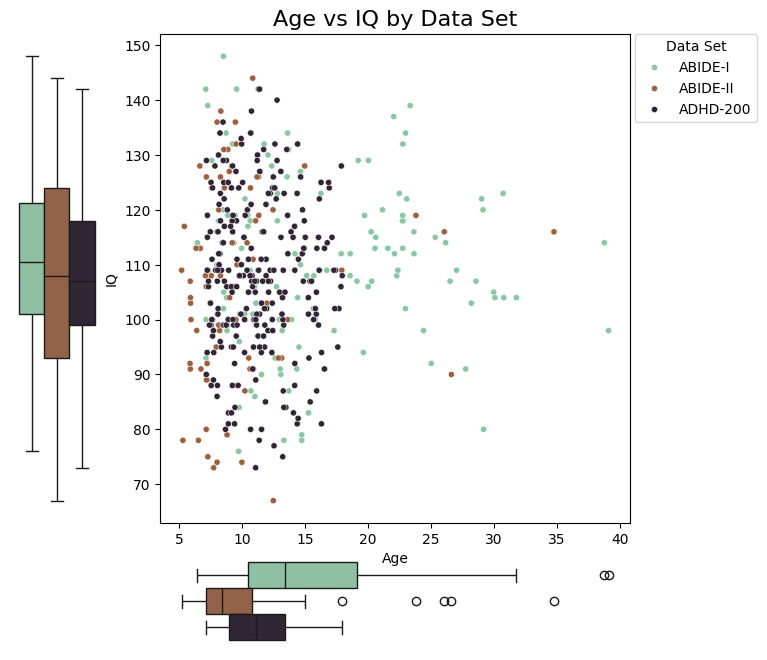

In [14]:
# Create a figure and define a custom gridspec layout
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(2, 2, 
                       width_ratios=[1, 5], 
                       height_ratios=[5, 1],
                       wspace=0.2, 
                       hspace=0.1)

palette = {
            "ABIDE-I": "#87c8a0",
            "ABIDE-II": "#a05f3c",
            "ADHD-200": "#322337"
        }

# Create axes manually
ax_joint = fig.add_subplot(gs[0, 1])
ax_marg_x = fig.add_subplot(gs[1, 1], sharex=ax_joint)
ax_marg_y = fig.add_subplot(gs[0, 0], sharey=ax_joint)

#Make scatter plot
sns.scatterplot(data=participants, 
                x="Age", 
                y="IQ",
                hue='Dataset', 
                s=20,
                ax=ax_joint,
                palette = palette)

#Make boxplots
sns.boxplot(data = participants,
            x = 'Age',
            hue = 'Dataset',
            ax=ax_marg_x,
            legend = False,
            palette = palette)

sns.boxplot(data = participants,
            y = 'IQ',
            hue = 'Dataset',
            ax=ax_marg_y,
            orientation="vertical",
            legend = False,
            palette = palette)

#Make legend appear outside of the scatter plot
handles, labels = ax_joint.get_legend_handles_labels()
ax_joint.legend(handles, labels,
                title='Data Set',
                bbox_to_anchor=(1.01, 1),
                loc='upper left',
                borderaxespad=0.)

ax_joint.set_title("Age vs IQ by Data Set",fontdict={'fontsize': 16})

#Remove axis
ax_marg_x.set_axis_off()
ax_marg_y.set_axis_off()

plt.savefig(f'Participants_IQ_vs_age_dataset.svg', bbox_inches='tight', dpi = 300)

plt.show()
